# Getting use to the `fhir.resource` library

In [1]:
from fhir.resources.patient import Patient
from fhir.resources.humanname import HumanName
from fhir.resources.contactpoint import ContactPoint

In [ ]:
patient = Patient()

In [ ]:
# Option 1: Separate
name = HumanName()
name.given = ["Mayank"]
name.family = "Tripathi"

patient.name = [name]

print(patient.model_dump_json(indent = 2))

{
  "resourceType": "Patient",
  "name": [
    {
      "family": "Tripathi",
      "given": [
        "Mayank"
      ]
    }
  ]
}


In [ ]:
# Option 2: In-line details
patient.name = [ HumanName(given = ["Mayank"], family = "Tripathi")]
print(patient.model_dump_json(indent = 2))

{
  "resourceType": "Patient",
  "name": [
    {
      "family": "Tripathi",
      "given": [
        "Mayank"
      ]
    }
  ]
}


In [5]:
# Adding Gender
patient.gender = "male"

print(patient.model_dump_json(indent = 2))

{
  "resourceType": "Patient",
  "name": [
    {
      "family": "Tripathi",
      "given": [
        "Mayank"
      ]
    }
  ],
  "gender": "male"
}


In [6]:
# Adding Contact - Email
patient.telecom = [ContactPoint(system="email", value="mayank_learn@fhir.com")]
print(patient.model_dump_json(indent = 2))

{
  "resourceType": "Patient",
  "name": [
    {
      "family": "Tripathi",
      "given": [
        "Mayank"
      ]
    }
  ],
  "telecom": [
    {
      "system": "email",
      "value": "mayank_learn@fhir.com"
    }
  ],
  "gender": "male"
}


In [ ]:
patient_json = patient.model_dump_json()

print(f"Patient Resouce in Python JSON Format : \n {patient_json}")

In [7]:
# Alternate way to display the Resource info.
patient_dict = patient.model_dump()

print(f"Patient Resouce in Python Dictionary Format : \n {patient_dict}")

Patient Resouce in Python Dictionary Format : 
 {'resourceType': 'Patient', 'name': [{'family': 'Tripathi', 'given': ['Mayank']}], 'telecom': [{'system': 'email', 'value': 'mayank_learn@fhir.com'}], 'gender': 'male'}


# `model_dump` vs `model_dump_json`
In the Python fhir.resources library, which is built on top of Pydantic V2, the methods `model_dump()` and `model_dump_json()` are used for serialization but produce different outputs and are used in different scenarios.

## `model_dump()`:
* Output: Returns a Python dictionary representing the model's fields and values.
* Purpose: Useful when you need to work with the data as a Python dictionary, perhaps to further manipulate it, pass it to other Python functions that expect dictionaries, or store it in a format where native Python types are acceptable (like a database that can store nested objects).
* Flexibility: Can include non-JSON serializable Python objects like datetime or custom Python objects by default. However, you can use the mode='json' argument to ensure the output is JSON-compatible if needed.
* Example: You might use model_dump() if you are going to process the FHIR resource data within your Python application before sending it to a system that specifically requires a dictionary format, or if you need to perform additional operations on the data in a dictionary structure.

## `model_dump_json()`:
* Output: Returns a JSON-encoded string representation of the model.
* Purpose: Primarily used when you need to serialize the FHIR resource into a JSON string to be sent over a network (e.g., to a FHIR server or API endpoint), stored in a JSON file, or used in contexts where a JSON string is explicitly required.
JSON Compliance: Guarantees that the output is a valid JSON string, making it suitable for interoperability with other systems that consume JSON data.
* Performance: Generally considered more performant than converting the output of model_dump() to JSON separately, as it can leverage optimized serialization mechanisms within Pydantic (and potentially Rust-based serialization in Pydantic V2).
* Example: When interacting with a FHIR server via an API, you would typically use model_dump_json() to convert your fhir.resources objects into the JSON payload for HTTP requests.

In summary, choose `model_dump()` when you need a Python dictionary representation of your FHIR resource, particularly if you're dealing with it internally in your Python application and might be passing it to functions or databases that handle Python objects. Choose `model_dump_json()` when you need a JSON-formatted string, such as for network communication with a FHIR server or saving to a JSON file, and where JSON compliance is crucial. 


# Post the Patient FHIR Resource to real FHIR Server
Will have to first import `requests` library, which will help us with the HTTP connection and the HTTP request. 

Then use the Base URL.

Base URL : https://fhir-bootcamp.medblocks.com/fhir


In [10]:
# !pip install requests

In [ ]:
import requests

base_url = "https://fhir-bootcamp.medblocks.com/fhir"

response = requests.post(base_url + "/Patient", json = patient_dict)

print(response.content)

b'{\n  "resourceType": "Patient",\n  "id": "5c78aed6-c2d2-44a7-8e06-c0d27c48fa09",\n  "meta": {\n    "versionId": "1",\n    "lastUpdated": "2025-07-13T23:06:48.624+00:00"\n  },\n  "text": {\n    "status": "generated",\n    "div": "<div xmlns=\\"http://www.w3.org/1999/xhtml\\"><div class=\\"hapiHeaderText\\">Mayank <b>TRIPATHI </b></div><table class=\\"hapiPropertyTable\\"><tbody/></table></div>"\n  },\n  "name": [ {\n    "family": "Tripathi",\n    "given": [ "Mayank" ]\n  } ],\n  "telecom": [ {\n    "system": "email",\n    "value": "mayank_learn@fhir.com"\n  } ],\n  "gender": "male"\n}'


In [ ]:
response_2 = requests.post(base_url + "/Patient", json = patient_json)

print(response_2.content)
# Might see a difference in the response content based on the format used (JSON vs Dictionary).
# Recommended to use JSON format for FHIR resources as it is more standardized and widely accepted in FHIR APIs.
# Note: Ensure the format is correct and not getting messaged with json format.

In [14]:
print(response.status_code)

201


In [13]:
response_patient = Patient.model_validate_json(response.content)

print(response_patient.id)

5c78aed6-c2d2-44a7-8e06-c0d27c48fa09


Now we can actually go into the FHIR server, and verify it.

Make sure to write the URL correctly in browser, or copy-paste from here.

Its `Base URL/Patient/<ID from above>`

https://fhir-bootcamp.medblocks.com/fhir/Patient/5c78aed6-c2d2-44a7-8e06-c0d27c48fa09 

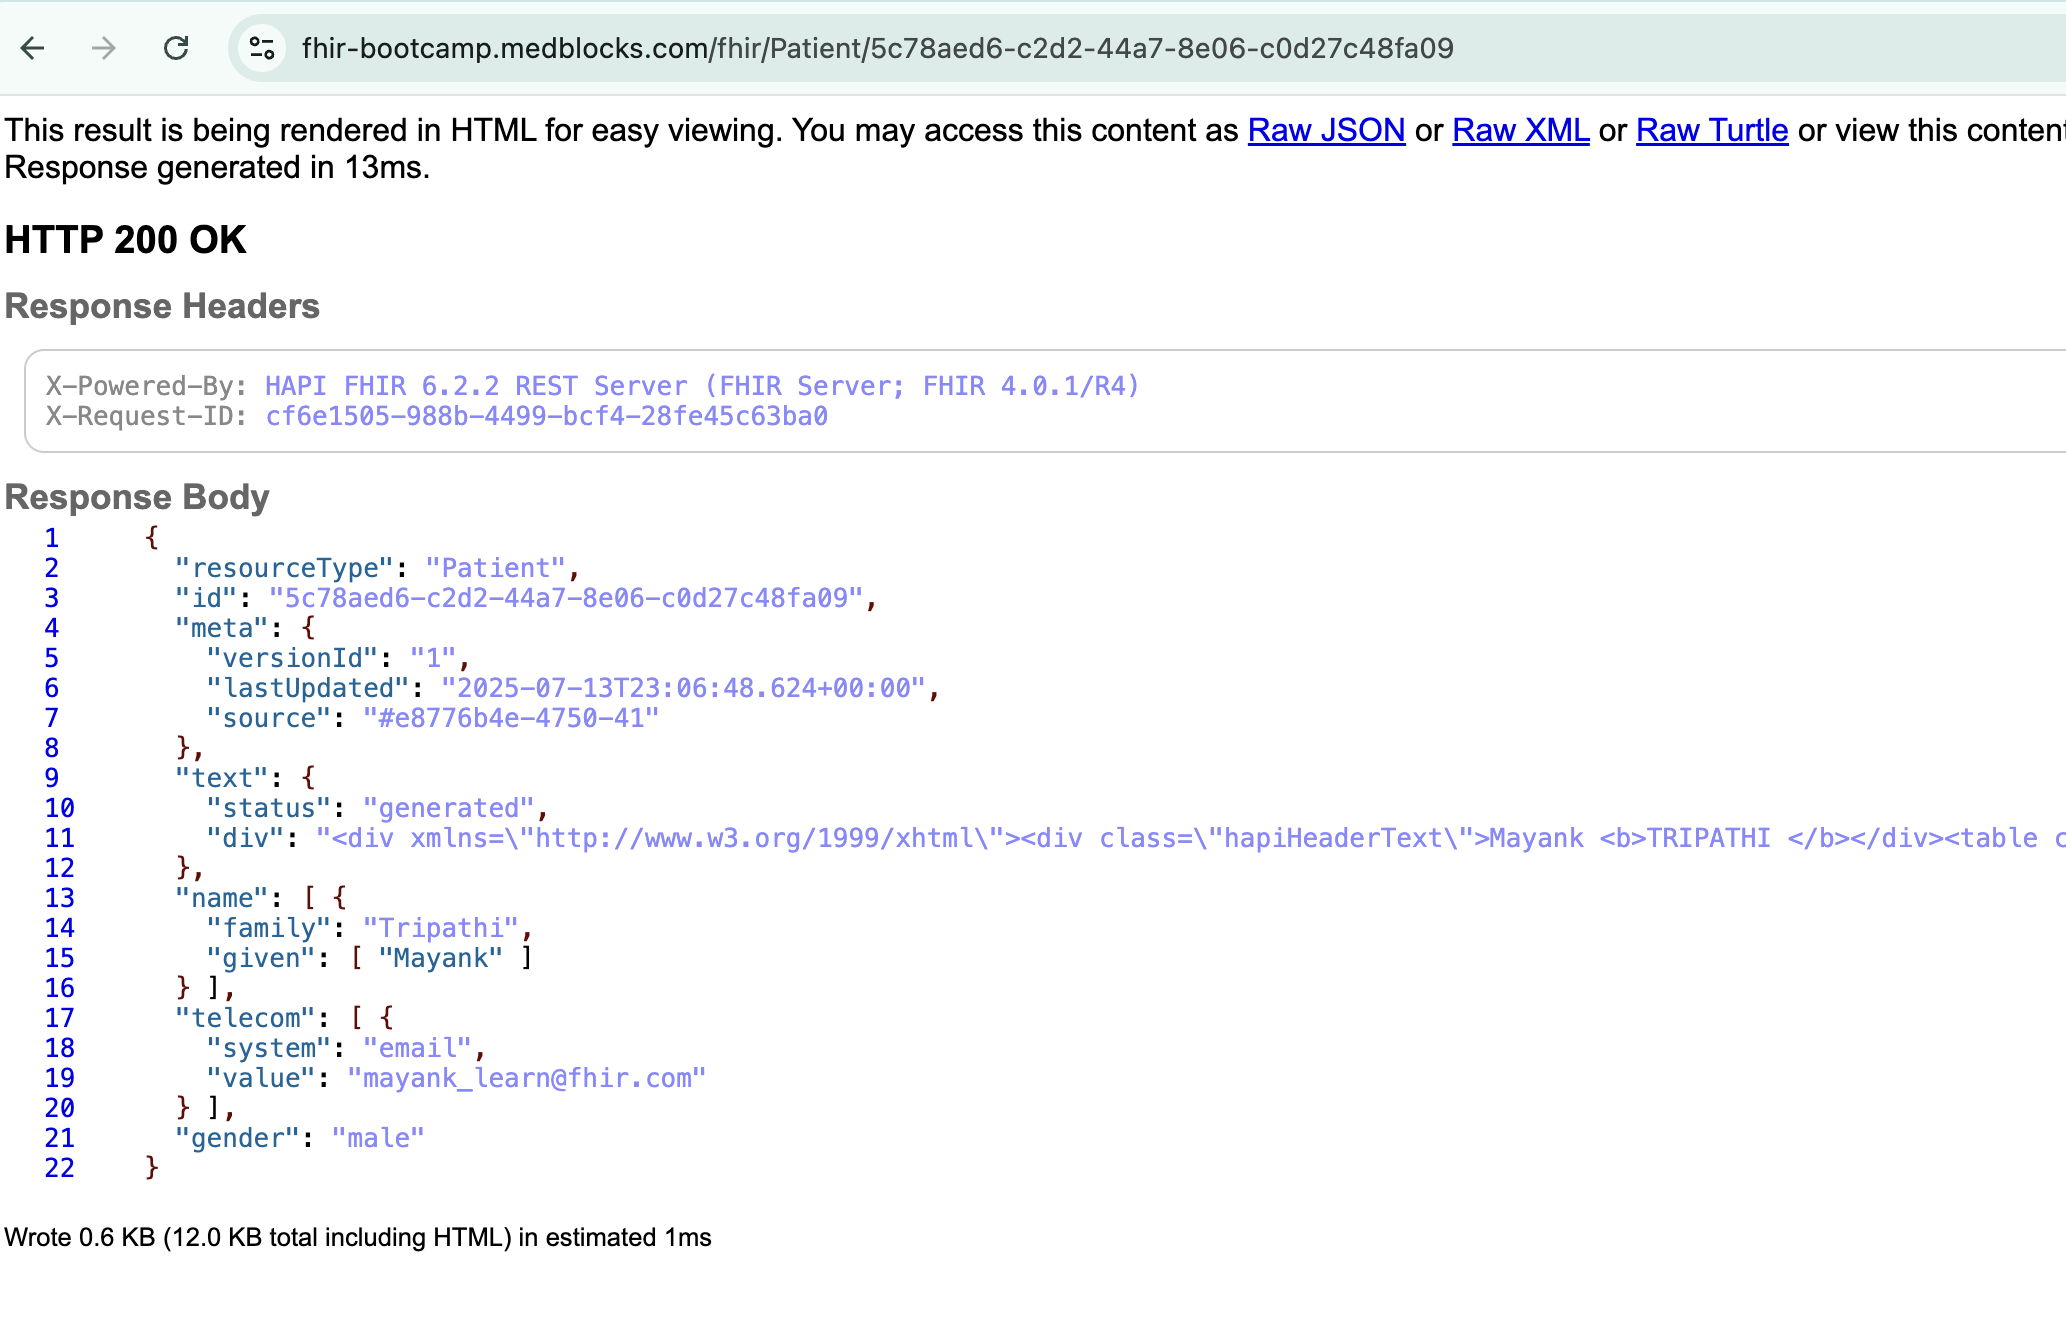


# Get the Response from FHIR Server

In [15]:
get_response = requests.get(base_url + "/Patient/5c78aed6-c2d2-44a7-8e06-c0d27c48fa09")

print(get_response.status_code)
print(get_response.content)

200
b'{\n  "resourceType": "Patient",\n  "id": "5c78aed6-c2d2-44a7-8e06-c0d27c48fa09",\n  "meta": {\n    "versionId": "1",\n    "lastUpdated": "2025-07-13T23:06:48.624+00:00",\n    "source": "#e8776b4e-4750-41"\n  },\n  "text": {\n    "status": "generated",\n    "div": "<div xmlns=\\"http://www.w3.org/1999/xhtml\\"><div class=\\"hapiHeaderText\\">Mayank <b>TRIPATHI </b></div><table class=\\"hapiPropertyTable\\"><tbody/></table></div>"\n  },\n  "name": [ {\n    "family": "Tripathi",\n    "given": [ "Mayank" ]\n  } ],\n  "telecom": [ {\n    "system": "email",\n    "value": "mayank_learn@fhir.com"\n  } ],\n  "gender": "male"\n}'


In [16]:
parsed_patient = Patient.model_validate_json(get_response.content)

print(parsed_patient.id)

5c78aed6-c2d2-44a7-8e06-c0d27c48fa09


# Get All Patients

In [17]:
all_patients = requests.get(base_url + "/Patient")

print(all_patients.status_code)

200


In [18]:
print(all_patients.content)

b'{\n  "resourceType": "Bundle",\n  "id": "f9480351-cced-48dc-b93c-d8fc6d9f2c8b",\n  "meta": {\n    "lastUpdated": "2025-07-14T03:54:17.386+00:00"\n  },\n  "type": "searchset",\n  "link": [ {\n    "relation": "self",\n    "url": "https://fhir-bootcamp.medblocks.com/fhir/Patient"\n  }, {\n    "relation": "next",\n    "url": "https://fhir-bootcamp.medblocks.com/fhir?_getpages=f9480351-cced-48dc-b93c-d8fc6d9f2c8b&_getpagesoffset=20&_count=20&_pretty=true&_bundletype=searchset"\n  } ],\n  "entry": [ {\n    "fullUrl": "https://fhir-bootcamp.medblocks.com/fhir/Patient/f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab",\n    "resource": {\n      "resourceType": "Patient",\n      "id": "f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab",\n      "meta": {\n        "versionId": "1",\n        "lastUpdated": "2025-06-07T13:52:22.084+00:00",\n        "source": "#85d51e04-abac-44"\n      },\n      "text": {\n        "status": "generated",\n        "div": "<div xmlns=\\"http://www.w3.org/1999/xhtml\\"><div class=\\"hapiHeader

In [19]:
print(all_patients.json())

{'resourceType': 'Bundle', 'id': 'f9480351-cced-48dc-b93c-d8fc6d9f2c8b', 'meta': {'lastUpdated': '2025-07-14T03:54:17.386+00:00'}, 'type': 'searchset', 'link': [{'relation': 'self', 'url': 'https://fhir-bootcamp.medblocks.com/fhir/Patient'}, {'relation': 'next', 'url': 'https://fhir-bootcamp.medblocks.com/fhir?_getpages=f9480351-cced-48dc-b93c-d8fc6d9f2c8b&_getpagesoffset=20&_count=20&_pretty=true&_bundletype=searchset'}], 'entry': [{'fullUrl': 'https://fhir-bootcamp.medblocks.com/fhir/Patient/f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab', 'resource': {'resourceType': 'Patient', 'id': 'f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab', 'meta': {'versionId': '1', 'lastUpdated': '2025-06-07T13:52:22.084+00:00', 'source': '#85d51e04-abac-44'}, 'text': {'status': 'generated', 'div': '<div xmlns="http://www.w3.org/1999/xhtml"><div class="hapiHeaderText">Igor <b>SCHOONBROOD </b></div><table class="hapiPropertyTable"><tbody><tr><td>Date of birth</td><td><span>22 May 1968</span></td></tr></tbody></table></div>'},

In [23]:
all_patients_dict = all_patients.json()

print(all_patients_dict['entry'])

[{'fullUrl': 'https://fhir-bootcamp.medblocks.com/fhir/Patient/f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab', 'resource': {'resourceType': 'Patient', 'id': 'f9b53a03-cdea-4d61-8ec3-99fffd5cc6ab', 'meta': {'versionId': '1', 'lastUpdated': '2025-06-07T13:52:22.084+00:00', 'source': '#85d51e04-abac-44'}, 'text': {'status': 'generated', 'div': '<div xmlns="http://www.w3.org/1999/xhtml"><div class="hapiHeaderText">Igor <b>SCHOONBROOD </b></div><table class="hapiPropertyTable"><tbody><tr><td>Date of birth</td><td><span>22 May 1968</span></td></tr></tbody></table></div>'}, 'name': [{'use': 'official', 'family': 'Schoonbrood', 'given': ['Igor']}], 'gender': 'male', 'birthDate': '1968-05-22', 'multipleBirthBoolean': False}, 'search': {'mode': 'match'}}, {'fullUrl': 'https://fhir-bootcamp.medblocks.com/fhir/Patient/1e9fd701-3d5b-4a28-ac90-741613f265e9', 'resource': {'resourceType': 'Patient', 'id': '1e9fd701-3d5b-4a28-ac90-741613f265e9', 'meta': {'versionId': '3', 'lastUpdated': '2025-07-02T16:53:13.286

In [24]:
print(len(all_patients_dict['entry']))

20


In [31]:
for p in all_patients_dict['entry']:
    # print(p)
    # print(p['resource'])
    # print(p['resource']['resourceType'])
    print(f"Patient Given Name: {p['resource']['name'][0]['given'][0]}")


Patient Given Name: Igor
Patient Given Name: Chris
Patient Given Name: John
Patient Given Name: John Singh  
Patient Given Name: Rahul
Patient Given Name: Rahul
Patient Given Name: Olexi
Patient Given Name: Elijah Jackson
Patient Given Name: Emma 
Patient Given Name: Mia
Patient Given Name: Maheswara
Patient Given Name: Rahul Arun
Patient Given Name: John
Patient Given Name: John
Patient Given Name: Isabella
Patient Given Name: Aditi
Patient Given Name: John
Patient Given Name: Greg
Patient Given Name: Ashle
Patient Given Name: Igor
